# Face Mask Detection with multiclass

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

## Face mask detector

In [2]:
from scipy.spatial import distance
from keras.models import load_model
model = load_model('multiclass_final.h5')
# Load the cascade
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [3]:
def resize_img(img):
    desired_height=1000
    img_height = img.shape[0]
    scale = desired_height / img_height
    width = int(img.shape[1] * scale)
    height = int(img.shape[0] * scale)
    dim = (width, height)
    # resize image
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    return resized

In [4]:
img = cv2.imread('test_img/incorrect_1.png')

label = {0: "Incorrect", 1: "With Mask", 2: "No Mask"}
color = {0: (253,213,11), 1: (102,204,0), 2: (255,51,51)}
img = cv2.cvtColor(img, cv2.IMREAD_GRAYSCALE)

faces = face_cascade.detectMultiScale(img,scaleFactor=1.1, minNeighbors=8)
out_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

# resize image
desired_height=1000
img_height = img.shape[0]
scale = desired_height / img_height
width = int(img.shape[1] * scale)
height = int(img.shape[0] * scale)
dim = (width, height)
out_img = cv2.resize(out_img, dim, interpolation = cv2.INTER_AREA)

for i in range(len(faces)):
    (x,y,w,h) = faces[i]
    x, y, w, h = int(x * scale), int(y * scale), int(w * scale), int(h * scale)
    crop = out_img[y-20:y+h+50,x-20:x+w+20]
    crop = cv2.resize(crop,(150,150))
    crop = np.reshape(crop,[1,150,150,3])/255.0
#     mask_result = model.predict_classes(crop)[0]
#     cv2.putText(out_img,label[mask_result],(x, y-10), cv2.FONT_HERSHEY_DUPLEX,1,color[mask_result],2)
#     cv2.rectangle(out_img,(x-20,y-20),(x+w+20,y+h+50),(255,255,255),5)
    mask_result = model.predict(crop)
    print(mask_result)
# plt.figure(figsize=(10,10))
# plt.imshow(out_img)


            

[[3.6557783e-14 1.0000000e+00 9.8714715e-17]]


In [5]:
def face_mask_detector(img, model):
    img = cv2.cvtColor(img, cv2.IMREAD_GRAYSCALE)

    faces = face_cascade.detectMultiScale(img,scaleFactor=1.1, minNeighbors=8)
    label = {0: "Incorrect", 1: "With Mask", 2: "No Mask"}
    color = {0: (253,213,11), 1: (102,204,0), 2: (255,51,51)}
    
    MIN_DISTANCE = 0
    
    if len(faces) > 0:
#         label = [0 for i in range(len(faces))]
#         for i in range(len(faces)-1):
#             for j in range(i+1, len(faces)):
#                 dist = distance.euclidean(faces[i][:2],faces[j][:2])
#                 if dist<MIN_DISTANCE:
#                     label[i] = 1
#                     label[j] = 1
        out_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) #colored output image
        # resize image
        desired_height=1000
        img_height = img.shape[0]
        scale = desired_height / img_height
        width = int(img.shape[1] * scale)
        height = int(img.shape[0] * scale)
        dim = (width, height)
        out_img = cv2.resize(out_img, dim, interpolation = cv2.INTER_AREA)
        
        for i in range(len(faces)):
            (x,y,w,h) = faces[i]
            x, y, w, h = int(x * scale), int(y * scale), int(w * scale), int(h * scale)
            
            crop = out_img[y:y+h,x:x+w]
            crop = cv2.resize(crop,(150,150))
            crop = np.reshape(crop,[1,150,150,3])/255.0
            mask_result = model.predict_classes(crop)[0]
            
            cv2.putText(out_img,label[mask_result],(x, y-20), cv2.FONT_HERSHEY_DUPLEX,2,color[mask_result],2)
            cv2.rectangle(out_img,(x,y),(x+w,y+h),color[mask_result],5)
             
        plt.figure(figsize=(10,10))
        plt.imshow(out_img)

    else:
        print("No Face!")

## No Mask

/Users/crystalhuang/anaconda3/lib/python3.8/site-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


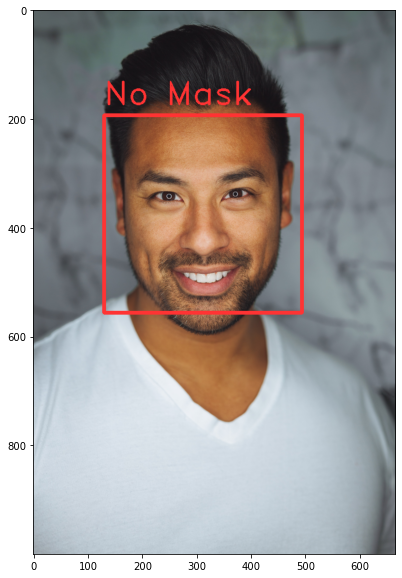

In [6]:
img = cv2.imread('test_img/unsplash.jpg')
face_mask_detector(img, model)

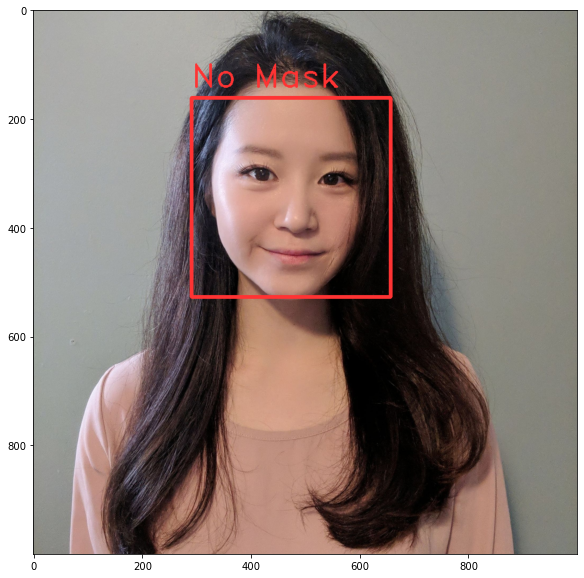

In [7]:
img = cv2.imread('test_img/self/test.jpg')
face_mask_detector(img, model)

## With Mask

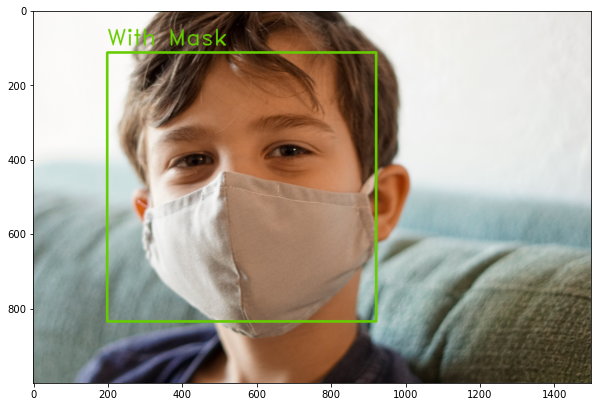

In [8]:
img = cv2.imread('test_img/test_mask _1.jpg')
face_mask_detector(img, model)

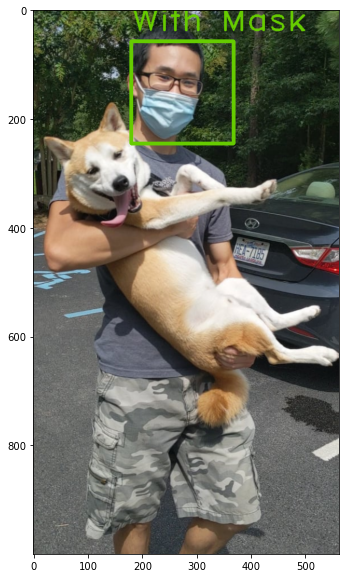

In [9]:
img = cv2.imread('test_img/test_mask_5.jpg')
face_mask_detector(img, model)

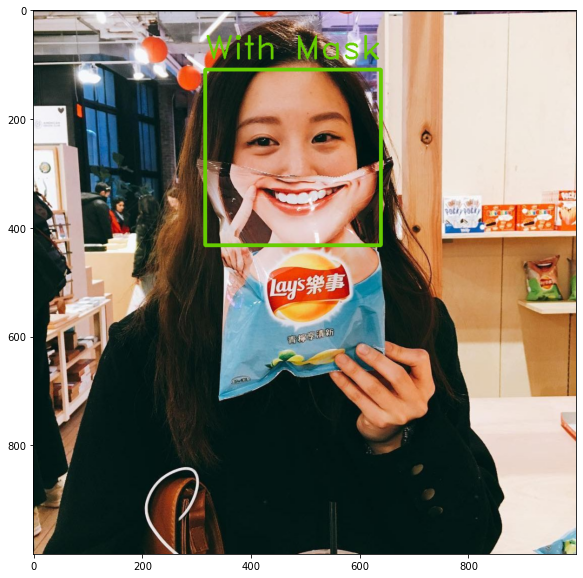

In [10]:
img = cv2.imread('test_img/self/test3.jpg')
face_mask_detector(img, model)

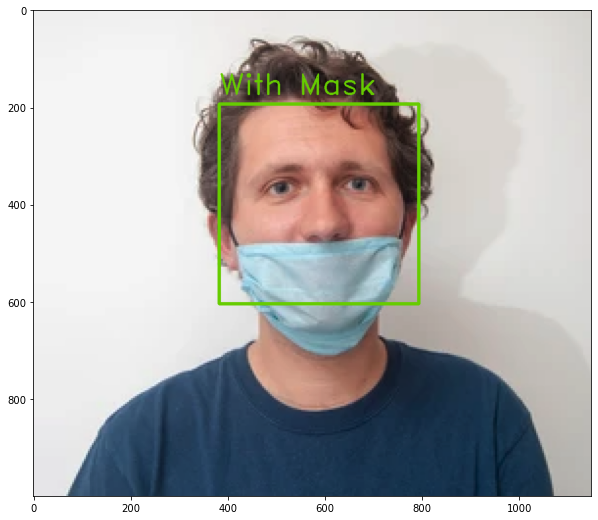

In [11]:
img = cv2.imread('test_img/incorrect_1.png')
face_mask_detector(img, model)

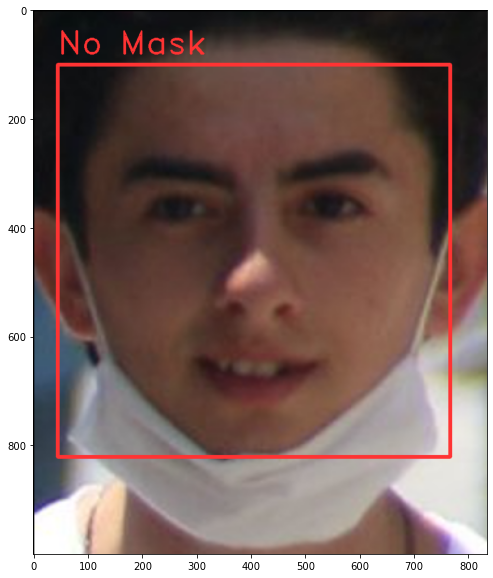

In [12]:
img = cv2.imread('test_img/inmask_3.png')
face_mask_detector(img, model)
# plt.imshow(img, cmap='gray')

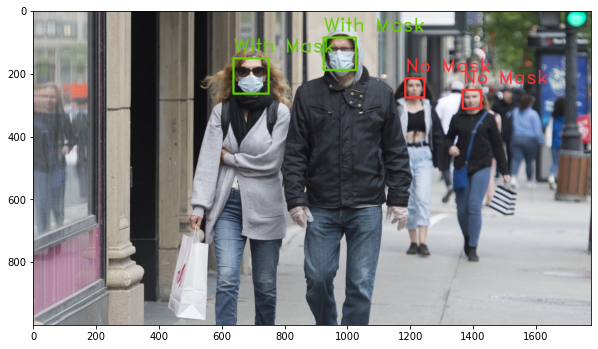

In [13]:
img = cv2.imread('test_img/group_mix.jpeg')
face_mask_detector(img, model)

## checking on test set again

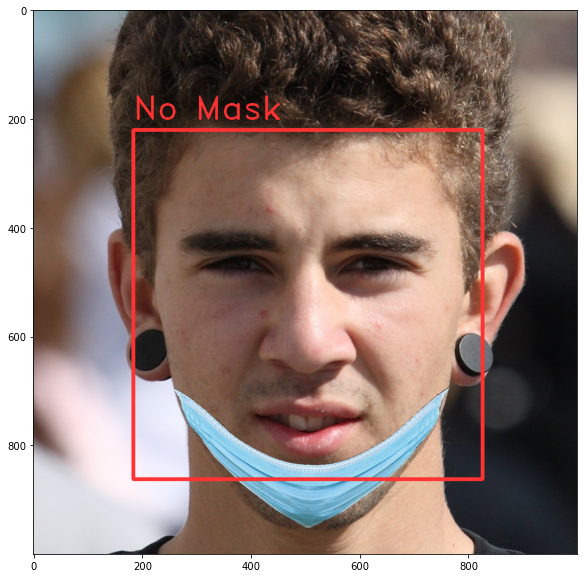

In [16]:
img = cv2.imread('Face Mask Dataset multiclass/Test/IncorrectMask/05888_Mask_Chin.jpg')
face_mask_detector(img, model)